<h1><center><font size="8">Assignment 1</font></center></h1>
<h1><center><font size="5">Author: Zach Chase</font></center></h1>

# Load Libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Part 1
Load the diabetes dataset into two numpy arrays: one for the feature set and one for the target. Pick a single feature to try to predict the target (disease progression). Document the reason you chose the feature you did. Break your single feature and target sets into training and test sets with the last 20 rows being in the test set.

Note that documentation about the diabetes dataset can be found here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [3]:
# Load Data
diabetes_data = load_diabetes()
X = diabetes_data.data
y = diabetes_data.target

print(diabetes_data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


The single feature I will use from the diabetes dataset to predict the target of disease progression is 'bmi'. According to this dataset, 'bmi' stands for 'body mass index' and is a measure of body fat based on height and weight that applies to adult men and women. Note that the formula for BMI is: BMI = kg/m$^2$ where kg is a person’s weight in kilograms and m$^{2}$ is their height in metres squared. I want to pick this feature because it is one of the features that an individual has more control over than the others, and thus I want to see how important it is that an individual maintains a healthy bmi so they get a favorable disease progression score.

In [7]:
# Break into test and training sets, with the last 20 rows being the test set
X_train = X[:-20,2].reshape(-1,1)
X_test = X[:20,2].reshape(-1,1)
y_train = y[:-20].reshape(-1,1)
y_test = y[:20].reshape(-1,1)

# Confirm appropriate shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(422, 1)
(20, 1)
(422, 1)
(20, 1)


# Part 2
Instantiate a linear regression model, and train it with your single feature and target sets.

In [8]:
# Train a linear regression model
diabetes_lm = LinearRegression().fit(X_train, y_train)

# Part 3
List the first 10 predictions on your single feature training set. Print out the feature coefficient and the root
mean squared error of your model.

In [9]:
# Get and display predictions
predictions = diabetes_lm.predict(X_test)
print(predictions[:10])

[[210.80457868]
 [104.6239487 ]
 [194.62467316]
 [142.03998022]
 [118.78136603]
 [114.73638965]
 [108.66892508]
 [151.14117707]
 [210.80457868]
 [189.56845268]]


In [11]:
# Display feature coefficient, including the intercept
print(diabetes_lm.coef_)
print(diabetes_lm.intercept_)

[[938.23786125]]
[152.91886183]


In [12]:
# Display the root mean squared error of the model
mean_squared_error(y_test, predictions)

3282.8407319148746

# Part 4
Print out a scatter plot with the feature you chose on the x-axis, and progression on the y-axis. Plot the regression line on this same graph with appropriate labels on each axis.

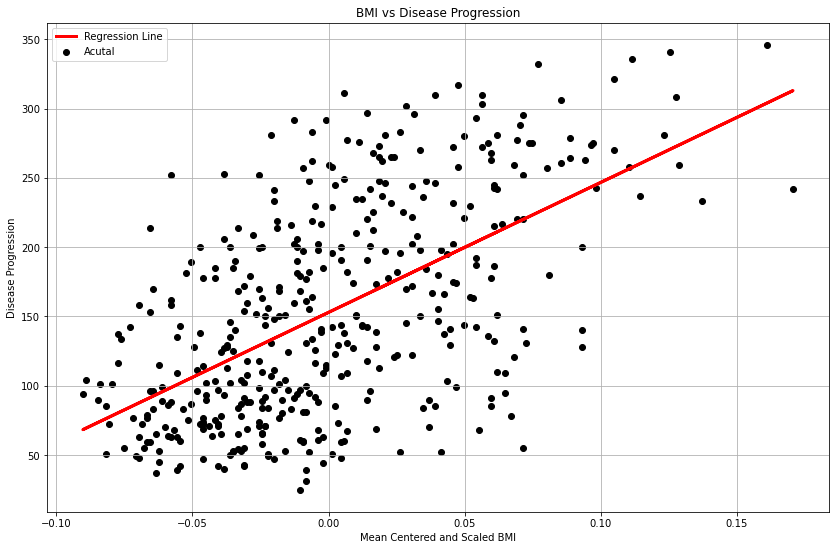

In [15]:
# Create scatter plot of actual values and predicted values
plt.figure(figsize = (14,9))
plt.scatter(X_train, y_train, color = 'black', label = 'Acutal') # Actual values
plt.plot(X_train, diabetes_lm.predict(X_train), color = 'red', linewidth = 3, label = 'Regression Line') # Predictions

# Add labels
plt.xlabel("Mean Centered and Scaled BMI")
plt.ylabel("Disease Progression")
plt.title("BMI vs Disease Progression")
plt.legend()
plt.grid()
plt.show()